In [2]:
import django, sys, os
sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import product, combinations
from utils.text import *
from pycountry_convert import  country_alpha2_to_continent_code, country_alpha3_to_country_alpha2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pandas as pd

In [3]:
df = pd.read_csv('../data/category_predictions.csv')
df.head()

Unnamed: 0       id                                            content  \
0           0   136746  Grasslands, one of the most widespread land co...   
1           1  1284614  Tree-ring width chronologies from the upper ti...   
2           2  1344242  This study examines the spatial and temporal p...   
3           3   289649  Permafrost, mainly of discontinuous type, that...   
4           4   399966  Since 2005, Morocco has designated 28 Importan...   

                                               title  \
0  Dynamic of grassland vegetation degradation an...   
1  Separating temperature from precipitation sign...   
2  GIS analysis of spatial and temporal patterns ...   
3  Thermokarst lake, hydrological flow and water ...   
4  Factors Influencing Species-Richness of Breedi...   

                                      wosarticle__de  \
0  Grassland degradation; Climate change; Human i...   
1  Northeastern Tibetan Plateau; Tree-ring width;...   
2  fire; geographic information systems; manageme...   
3  Permafrost; Thermokarst lakes; Hydrological cy...   
4  Breeding waterfowl; Diversity; Spatial scale; ...   

                                      wosarticle__wc  ar5  seen  relevant  \
0                                        ['Ecology']  0.0   0.0       0.0   
1  ['Geography, Physical; Geosciences, Multidisci...  0.0   0.0       0.0   
2                                       ['Forestry']  0.0   0.0       0.0   
3  ['Engineering, Civil; Geosciences, Multidiscip...  0.0   0.0       0.0   
4                ['Ecology; Environmental Sciences']  0.0   0.0       0.0   

   12 - Coastal and marine Ecosystems  ...  \
0                                 0.0  ...   
1                                 0.0  ...   
2                                 0.0  ...   
3                                 0.0  ...   
4                                 0.0  ...   

   2 - Trend or climate change attribtion - lower_pred  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                1.0     
4                                                0.0     

   2 - Trend or climate change attribtion - upper_pred  \
0                                           0.539345     
1                                           1.000000     
2                                           1.000000     
3                                           1.000000     
4                                           0.804738     

   2 - 2.4. Sensitivity - mean_prediction  \
0                                1.000000   
1                                0.833333   
2                                0.166667   
3                                0.000000   
4                                0.000000   

   2 - 2.4. Sensitivity - std_prediction  2 - 2.4. Sensitivity - lower_pred  \
0                               0.000000                           1.000000   
1                               0.372678                           0.460655   
2                               0.372678                           0.000000   
3                               0.000000                           0.000000   
4                               0.000000                           0.000000   

   2 - 2.4. Sensitivity - upper_pred  \
0                           1.000000   
1                           1.000000   
2                           0.539345   
3                           0.000000   
4                           0.000000   

   2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction  \
0                                                0.0                                   
1                                                0.0                                   
2                                                0.0                                   
3                                                0.0                                   
4

In [4]:
geos = pd.read_csv('../data/geo_df.csv')
geos = geos.drop_duplicates(["doc_id","geonameid"])
print(geos.shape)
geos.head()

(105576, 9)


admin1       lat       lon country_code3  geonameid  \
0     NaN  39.76000  -98.5000           USA    6252001   
1     NaN  22.00000   79.0000           IND    1269750   
2     NaN  60.00000  100.0000           RUS    2017370   
3  Punjab  31.47060   74.3488           PAK    7043356   
4     NaN   3.51342 -132.1875           NaN    2363254   

                                place_name feature_class feature_code   doc_id  
0                            United States             A         PCLI  3305893  
1                        Republic of India             A         PCLI  1477550  
2                       Russian Federation             A         PCLI  1477550  
3  Pakistan Foundation Technical Institute             S         SCHC  1477550  
4                            Pacific Ocean             H          OCN  1477550

In [5]:
places = pd.read_csv('../data/place_df.csv')
places.head()

Unnamed: 0                    word                         spans  \
0           0           United States  [{'start': 427, 'end': 440}]   
1           1       Northern Pakistan    [{'start': 52, 'end': 69}]   
2           2  Western RussiaPakistan  [{'start': 100, 'end': 122}]   
3           3                   India  [{'start': 140, 'end': 145}]   
4           4                  Russia  [{'start': 697, 'end': 703}]   

  country_predicted  country_conf  \
0               USA      0.999811   
1               PAK      0.000000   
2               RUS      0.000000   
3               IND      0.999398   
4               RUS      0.999401   

                                                 geo   doc_id  
0  {'admin1': 'NA', 'lat': '39.76', 'lon': '-98.5...  3305893  
1                                                NaN  1477550  
2                                                NaN  1477550  
3  {'admin1': 'NA', 'lat': '22', 'lon': '79', 'co...  1477550  
4  {'admin1': 'NA', 'lat': '60', 'lon': '100', 'c...  1477550

In [6]:
df_places = pd.merge(df,places,left_on="id",right_on="doc_id")
df_places.head()

Unnamed: 0_x      id                                            content  \
0             0  136746  Grasslands, one of the most widespread land co...   
1             0  136746  Grasslands, one of the most widespread land co...   
2             0  136746  Grasslands, one of the most widespread land co...   
3             0  136746  Grasslands, one of the most widespread land co...   
4             0  136746  Grasslands, one of the most widespread land co...   

                                               title  \
0  Dynamic of grassland vegetation degradation an...   
1  Dynamic of grassland vegetation degradation an...   
2  Dynamic of grassland vegetation degradation an...   
3  Dynamic of grassland vegetation degradation an...   
4  Dynamic of grassland vegetation degradation an...   

                                      wosarticle__de wosarticle__wc  ar5  \
0  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
1  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
2  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
3  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
4  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   

   seen  relevant  12 - Coastal and marine Ecosystems  ...  \
0   0.0       0.0                                 0.0  ...   
1   0.0       0.0                                 0.0  ...   
2   0.0       0.0                                 0.0  ...   
3   0.0       0.0                                 0.0  ...   
4   0.0       0.0                                 0.0  ...   

   2 - 2.5. Detection of a regional climate trend (no attribution) - std_prediction  \
0                                                0.0                                  
1                                                0.0                                  
2                                                0.0                                  
3                                                0.0                                  
4                                                0.0                                  

   2 - 2.5. Detection of a regional climate trend (no attribution) - lower_pred  \
0                                                0.0                              
1                                                0.0                              
2                                                0.0                              
3                                                0.0                              
4                                                0.0                              

   2 - 2.5. Detection of a regional climate trend (no attribution) - upper_pred  \
0                                                0.0                              
1                                                0.0                              
2                                                0.0                              
3                                                0.0                              
4                                                0.0                              

   Unnamed: 0_y            word                           spans  \
0         86174           China    [{'start': 157, 'end': 162}]   
1         86175         Qinghai  [{'start': 1777, 'end': 1784}]   
2         86176  Inner Mongolia  [{'start': 1786, 'end': 1800}]   
3         86177        Xinjiang  [{'start': 1806, 'end': 1814}]   
4         86178           Gansu  [{'start': 1922, 'end': 1927}]   

   country_predicted  country_conf  \
0                CHN      0.999764   
1                CHN      0.993103   
2                CHN      0.993103   
3                CHN      0.993103   
4                CHN      0.993103   

                                                 geo  doc_id  
0  {'admin1': 'NA', 'lat': '35', 'lon': '105', 'c...  136746  
1  {'admin1': 'Qinghai', 'lat': '36', 'lon': '96'...  136746  
2  {'admin1': 'Inner Mong

In [7]:
sd = df_places[(df_places['word']=="SD") & pd.notna(df_places['geo'])]
sd.shape

(52, 297)

In [8]:
df_geo = pd.merge(df,geos,left_on="id",right_on="doc_id")
df_geo.head()

Unnamed: 0      id                                            content  \
0           0  136746  Grasslands, one of the most widespread land co...   
1           0  136746  Grasslands, one of the most widespread land co...   
2           0  136746  Grasslands, one of the most widespread land co...   
3           0  136746  Grasslands, one of the most widespread land co...   
4           0  136746  Grasslands, one of the most widespread land co...   

                                               title  \
0  Dynamic of grassland vegetation degradation an...   
1  Dynamic of grassland vegetation degradation an...   
2  Dynamic of grassland vegetation degradation an...   
3  Dynamic of grassland vegetation degradation an...   
4  Dynamic of grassland vegetation degradation an...   

                                      wosarticle__de wosarticle__wc  ar5  \
0  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
1  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
2  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
3  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   
4  Grassland degradation; Climate change; Human i...    ['Ecology']  0.0   

   seen  relevant  12 - Coastal and marine Ecosystems  ...  \
0   0.0       0.0                                 0.0  ...   
1   0.0       0.0                                 0.0  ...   
2   0.0       0.0                                 0.0  ...   
3   0.0       0.0                                 0.0  ...   
4   0.0       0.0                                 0.0  ...   

   2 - 2.5. Detection of a regional climate trend (no attribution) - upper_pred  \
0                                                0.0                              
1                                                0.0                              
2                                                0.0                              
3                                                0.0                              
4                                                0.0                              

                              admin1    lat     lon  country_code3  geonameid  \
0                                NaN  35.00  105.00            CHN    1814991   
1                            Qinghai  36.00   96.00            CHN    1280239   
2                     Inner Mongolia  43.50  114.75            CHN    2035607   
3  Xinjiang Uyghur Autonomous Region  41.50   85.50            CHN    1529047   
4                              Gansu  37.75  102.75            CHN    1810676   

                         place_name  feature_class  feature_code  doc_id  
0        People’s Republic of China              A          PCLI  136746  
1                     Qinghai Sheng              A          ADM1  136746  
2  Inner Mongolia Autonomous Region              A          ADM1  136746  
3            Xinjiang Uygur Zizhiqu              A          ADM1  136746  
4                       Gansu Sheng              A          ADM1  136746  

[5 rows x 299 columns]

In [9]:
bad_ids = ['9858236','9967606','4100592','4295982','5228874','4379445','5459219','7195491','5268166','4381982','5554419','5833847','4878074','5020546','5650274','7172853']
print(df_geo.shape)
df_geo=df_geo[~df_geo['geonameid'].isin(bad_ids)]
print(df_geo.shape)

(105576, 299)
(102023, 299)


In [10]:
sd_ids = list(sd["doc_id"])
df_exclude = df_geo.query('doc_id in @sd_ids').query('geonameid==5769223')
df_geo = df_geo[~df_geo['id'].isin(df_exclude['id'])]

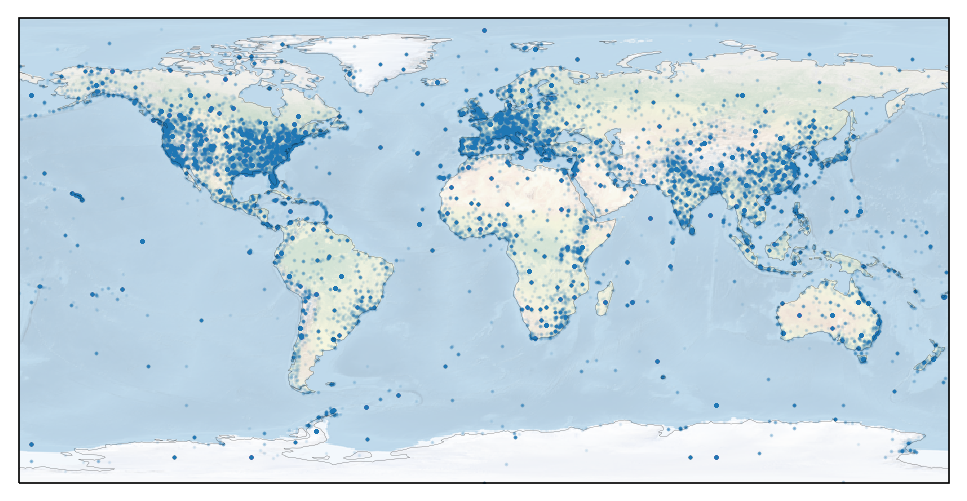

In [11]:
fig, ax = plt.subplots(dpi=150, figsize=(8,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(lw=0.1)
ax.stock_img(alpha=0.5)
ax.set_global()
ax.scatter(geos['lon'], geos['lat'],alpha=0.1,s=0.5)
plt.savefig('../plots/maps/all_predicted_places.png',bbox_inches="tight")
plt.savefig('../plots/maps/all_predicted_places.pdf',bbox_inches="tight")

In [12]:
pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]

for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    df.loc[df[label]==1,c] = 1
    print(df[c].sum())
print(pred_cats)

attrib_cats = [c for c  in df.columns if "2 - " in c and " - mean_prediction" in c and not "12 - " in c]
for c in attrib_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    df.loc[df[label]==1,c] = 1
    print(df[c].sum())
attrib_cats

1994.0
2135.833333333333
7694.166666666668
7977.833333333335
3508.5
3682.3333333333335
28089.166666666668
28527.000000000004
6168.333333333334
6409.000000000001
['12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Coastal and marine Ecosystems - mean_prediction', '12 - Terrestrial ES - mean_prediction', '12 - Human and managed - mean_prediction']
37018.0
37444.333333333336
26211.0
26536.166666666664
1869.0000000000002
1975.0000000000002


['2 - Trend or climate change attribtion - mean_prediction',
 '2 - 2.4. Sensitivity - mean_prediction',
 '2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction']

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


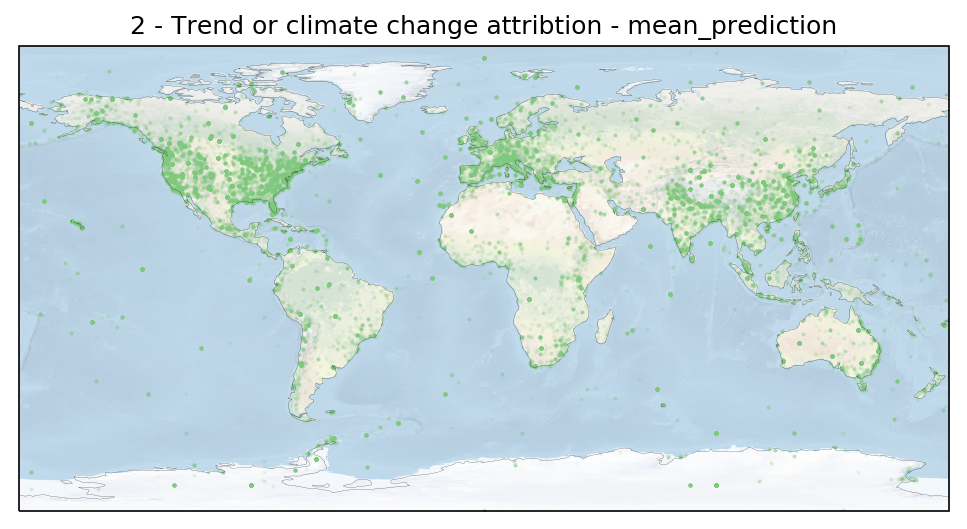

In [13]:
pred_cats = [c for c  in df.columns if "12 - " in c and " - prediction" in c]

colors = ['#7fc97f','#beaed4','#fdc086']

pdf = df_geo[df_geo['feature_code']!="PCLI"]

for i,c in enumerate(attrib_cats):
    fig, ax = plt.subplots(dpi=150, figsize=(8,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(lw=0.1)
    ax.stock_img(alpha=0.5)
    ax.set_global()
    ax.set_title(c)
    col = colors[i]
    ax.scatter(pdf[pdf[c]>=0.5]['lon'], pdf[pdf[c]>=0.5]['lat'],alpha=0.1,s=1,label=None,c=col)

    
ax.legend(fontsize=6)

In [14]:
pred_cats = [c for c  in df.columns if "12 - " in c and " - prediction" in c]
fig, ax = plt.subplots(dpi=150, figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(lw=0.1)
ax.stock_img(alpha=0.5)
ax.set_global()
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
for j, pdf in enumerate(np.array_split(df_geo,5)):
    for i,c in enumerate(pred_cats):
        #pdf = pdf[pdf[c]>0.5]
        col = colors[i]
        ax.scatter(pdf[pdf[c]>0.5]['lon'], pdf[pdf[c]>0.5]['lat'],alpha=0.05,s=0.5,label=None,c=col)
        if j==0:
            ax.scatter([],[],alpha=0.5,label=c,c=col)
    
ax.legend(fontsize=6)

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


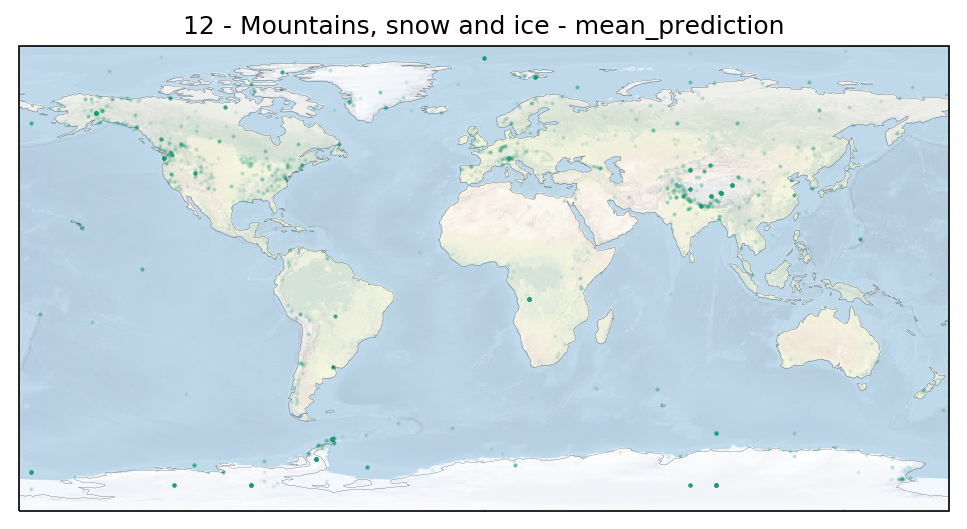

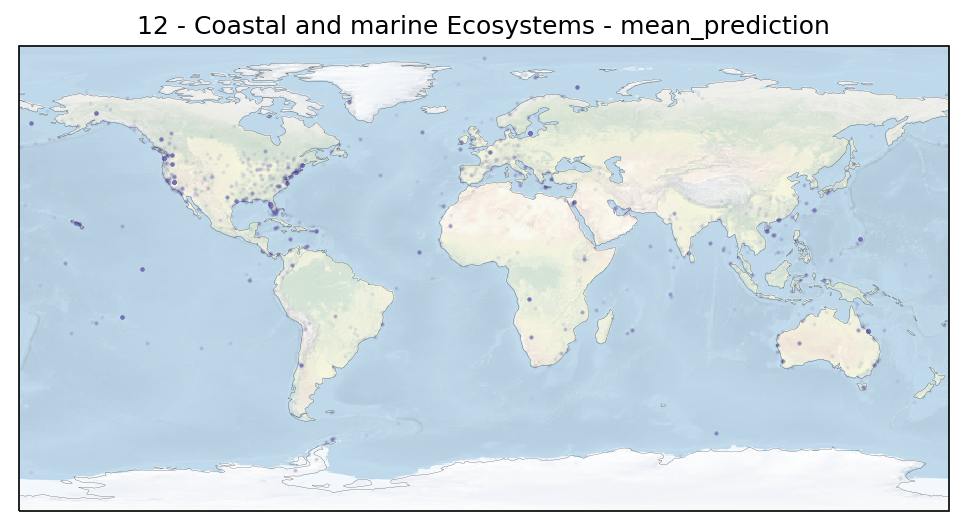

In [15]:
pred_cats = [c for c  in df.columns if "12 - " in c and "mean" in c]
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

pdf = df_geo[df_geo['feature_code']!="PCLI"]

for i,c in enumerate(pred_cats):
    fig, ax = plt.subplots(dpi=150, figsize=(8,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(lw=0.1)
    ax.stock_img(alpha=0.5)
    ax.set_global()
    ax.set_title(c)
    col = colors[i]
    ax.scatter(pdf[pdf[c]>0.5]['lon'], pdf[pdf[c]>0.5]['lat'],alpha=0.1,s=1,label=None,c=col)
    if j==0:
        ax.scatter([],[],alpha=0.5,label=c,c=col)
    
ax.legend(fontsize=6)

In [16]:
c.split(' - ')[1].replace("_","")

'Human and managed'

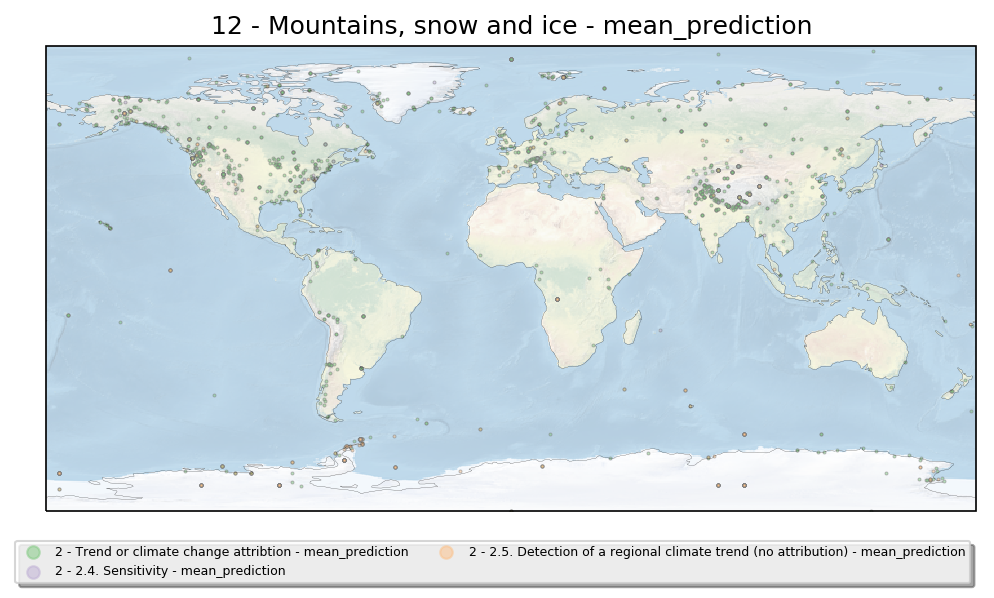

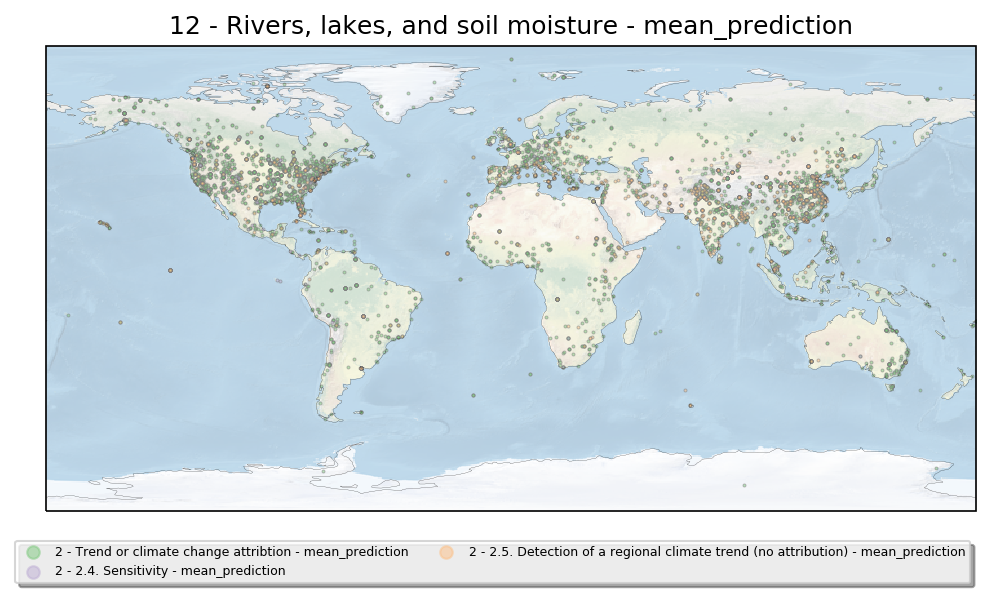

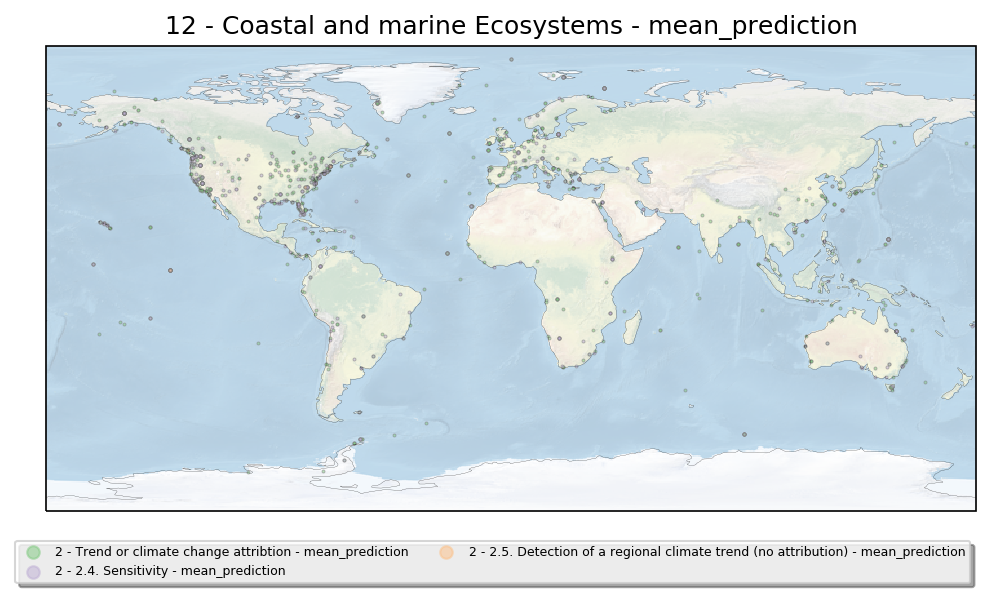

In [23]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
colors = ['#7fc97f','#beaed4','#fdc086']
pdf = df_geo[df_geo['feature_code']!="PCLI"]

for i,c in enumerate(pred_cats):
    fig, ax = plt.subplots(dpi=150, figsize=(8,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(lw=0.1)
    ax.stock_img(alpha=0.5)
    ax.set_global()
    ax.set_title(c)
    for j, ac in enumerate(attrib_cats):
        col = colors[j]
        ax.scatter(
            pdf[(pdf[c]>=0.5)&(pdf[ac]>0.5)]['lon'], pdf[(pdf[c]>=0.5)&(pdf[ac]>0.5)]['lat'],
            alpha=0.5,s=2,label=None,c=col,edgecolor="grey",linewidth=0.5)
        ax.scatter([],[],alpha=0.5,label=ac,c=col)
    
    ax.legend(fontsize=6, bbox_to_anchor=(1,-0.05),ncol=2, fancybox=True,shadow=True)
    cname = c.split(' - ')[1].replace(" ","_")
    plt.savefig(f'../plots/maps/predicted_places_{cname}_attribution.png',dpi=500)
    plt.savefig(f'../plots/maps/predicted_places_{cname}_attribution.pdf')

In [140]:
us_coastal = df_geo[
    (df_geo['12 - Coastal and marine Ecosystems - prediction']==1) &
    (df_geo['lat']<51) &
    (df_geo['lat']>34) &
    (df_geo['lon']>-117) &
    (df_geo['lon']<-84)
]
us_coastal.shape
for i, row in us_coastal.groupby('geonameid'):
    if row.shape[0]<2:
        continue
    print(row['title'])
    print(row['place_name'])
    print(row['id'])

20472    Severe 2010 Cold-Water Event Caused Unpreceden...
72956    Determining the Extent and Characterizing Cora...
Name: title, dtype: object
20472    Martin
72956    Martin
Name: place_name, dtype: object
20472    1438671
72956     541079
Name: id, dtype: int64
83026    The Response of Fish Diversity in a Highly Mod...
85025    The Long-Term Illinois River Fish Population M...
89056    Can data from disparate long-term fish monitor...
Name: title, dtype: object
83026    Illinois
85025    Illinois
89056    Illinois
Name: place_name, dtype: object
83026    2353536
85025    2359549
89056    1279618
Name: id, dtype: int64
55495    Spatial and temporal dynamics of nearshore fis...
76953    Zooplankton-phytoplankton interactions in Gree...
Name: title, dtype: object
55495    Lake Michigan Beach
76953    Lake Michigan Beach
Name: place_name, dtype: object
55495     783936
76953    2339735
Name: id, dtype: int64
40956    Geographic, anthropogenic, and habitat influen...
55497    Spatial an

In [144]:

for i, row in df_places[df_places['id']==265589].reset_index(drop=True).iterrows():
    if i==0:
        print(row['content'])
    print("word in text: ",row['word'])
    print(row['geo'])
    print(row['country_predicted'])

Skeletal extension-rates and their variability are significantly lower in Pleistocene massive reef-building corals (Montastraea annularis group) in south Florida as compared with modern corals of the same taxa in the same study area. We analyzed 1,429 annual increments in 18 cores of Montastraea colonies from Windley Key and the Key Largo Waterway in the late Pleistocene Key Largo Limestone, which was deposited during marine isotope stage 5e (ca. 125 kyrs BP). The average extension-rate is 5.2 mm/year, which is about half the value known for modern Montastraea in shallow water reef environments. With an average standard deviation (SD) of 1.01, the variability of extension-rates is at the lower range limit of modern Montastraea in south Florida (SD = 1-3.6). Due to the higher sea level, the Pleistocene Key Largo patch reef trend was located on a large carbonate platform. Unlike today, the island chain of the Florida Keys, which function as a shelter for the Florida Reef Tract from inimi